In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Cleaning_fun as CF
#from Cleaning_fun import print_full
#pd.options.display.max_columns=300
#pd.options.display.max_rows=300


In [2]:
# Obro tot l'arxiu per agafar-ne una mostra aleatoria,
df = pd.read_csv('../Data/train.csv')

In [3]:
df.dropna(subset=['price'], inplace=True)
#print_full(df.info())

In [4]:
df_lowp = df[df.price < 1000] # Let's take just the lower prices to observe the distribution
df_highp = df[df.price > 1000]
df_vlowp = df[df.price < 300]

0    150.0
Name: price, dtype: float64


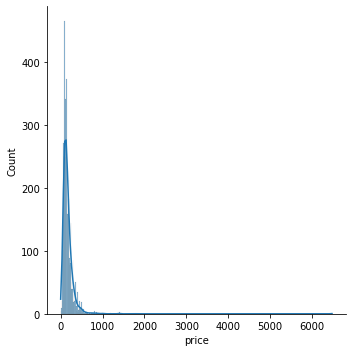

In [5]:
print(df_vlowp.price.mode())
sns.displot(data=df, x='price', kind='hist',kde=True) # Veiem que es una T d'student MOLT deslpaçada cam als preus baixos. 

In [12]:
df =CF.Clean_columns(df)

In [13]:
df.describe()

,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4167.000000,4167.000000,0.0,4167.000000,4167.000000,4167.000000,0.0,3914.000000,3993.000000,4167.000000,...,3782.000000,3782.000000,3782.000000,3782.000000,3782.000000,4167.000000,4167.000000,4167.000000,4167.000000,3790.000000
mean,2.488601,2.488601,NaN,52.366913,4.891435,2.941205,NaN,1.577414,1.956424,168.676986,...,4.751623,4.875354,4.882110,4.782078,4.643794,2.155508,1.090473,0.934725,0.016559,1.452625
std,14.508041,14.508041,NaN,0.016835,0.036176,1.464789,NaN,0.916811,1.640881,180.658555,...,0.329339,0.253716,0.258994,0.249462,0.308366,3.094729,1.913322,2.325021,0.207780,2.816455
min,0.000000,0.000000,NaN,52.291030,4.753510,0.000000,NaN,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.000000,1.000000,NaN,52.356655,4.869430,2.000000,NaN,1.000000,1.000000,98.000000,...,4.670000,4.852500,4.870000,4.670000,4.530000,1.000000,0.000000,0.000000,0.000000,0.310000
50%,1.000000,1.000000,NaN,52.366590,4.888790,2.000000,NaN,1.000000,1.000000,138.000000,...,4.850000,4.950000,4.960000,4.845000,4.690000,1.000000,1.000000,0.000000,0.000000,0.680000
75%,2.000000,2.000000,NaN,52.376545,4.908985,4.000000,NaN,2.000000,2.000000,200.000000,...,4.970000,5.000000,5.000000,4.970000,4.810000,2.000000,1.000000,1.000000,0.000000,1.700000
max,718.000000,718.000000,NaN,52.424760,5.026430,16.000000,NaN,10.000000,33.000000,6477.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,22.000000,22.000000,21.000000,4.000000,95.890000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 62 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   4167 non-null   object 
 1   description                                   4159 non-null   object 
 2   host_since                                    4167 non-null   object 
 3   host_about                                    2655 non-null   object 
 4   host_response_time                            2754 non-null   object 
 5   host_response_rate                            2754 non-null   object 
 6   host_acceptance_rate                          3075 non-null   object 
 7   host_is_superhost                             4167 non-null   object 
 8   host_thumbnail_url                            4167 non-null   object 
 9   host_picture_url                              4167 non-null   o

In [15]:
lista_UV = []
for col in CF.num_NaNs(df, n=1000):
    lista_UV.append((df[col].unique(), col))
lista_UV[2]
df[df.host_response_time == 'within a day'].count()

listing_url                                     556
description                                     556
host_since                                      556
host_about                                      339
host_response_time                              556
                                               ... 
calculated_host_listings_count                  556
calculated_host_listings_count_entire_homes     556
calculated_host_listings_count_private_rooms    556
calculated_host_listings_count_shared_rooms     556
reviews_per_month                               490
Length: 62, dtype: int64

In [27]:
# Let's also take a look on the test we are gonna use,
test = pd.read_csv('../Data/test.csv')
df =test


In [28]:
#CF.Clean_columns(test).info()

In [30]:
# df_sample_lowp = df[df.price < 1000] # Let's take just the lower prices to observe the distribution
# df_sample_highp = df[df.price > 1000]
# df_sample_vlowp = df[df.price < 300]

In [31]:
df_sample_vlowp.price.mode()
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1389.000000,1.389000e+03,1.389000e+03,1389.000000,1389.000000,0.0,1389.000000,1389.000000,1389.000000,0.0,...,1251.000000,1252.000000,1252.000000,1252.000000,1252.000000,1389.000000,1389.000000,1389.000000,1389.000000,1254.000000
mean,694.000000,2.021121e+13,8.714512e+07,2.726422,2.726422,NaN,52.367785,4.891348,2.996400,NaN,...,4.754029,4.866126,4.877005,4.778435,4.632436,2.257739,1.195104,0.915047,0.023758,1.291866
std,401.114074,0.000000e+00,1.152146e+08,13.904938,13.904938,NaN,0.017478,0.036663,1.448188,NaN,...,0.295396,0.224456,0.224408,0.247202,0.302227,3.344285,2.311500,2.293327,0.268704,1.688739
min,0.000000,2.021121e+13,3.592000e+03,0.000000,0.000000,NaN,52.290340,4.778870,0.000000,NaN,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,347.000000,2.021121e+13,8.729867e+06,1.000000,1.000000,NaN,52.356590,4.869590,2.000000,NaN,...,4.660000,4.830000,4.850000,4.670000,4.520000,1.000000,0.000000,0.000000,0.000000,0.290000
50%,694.000000,2.021121e+13,2.629466e+07,1.000000,1.000000,NaN,52.367150,4.888130,2.000000,NaN,...,4.840000,4.940000,4.950000,4.835000,4.670000,1.000000,1.000000,0.000000,0.000000,0.650000
75%,1041.000000,2.021121e+13,1.294553e+08,2.000000,2.000000,NaN,52.376940,4.907670,4.000000,NaN,...,4.970000,5.000000,5.000000,4.970000,4.800000,2.000000,1.000000,1.000000,0.000000,1.547500
max,1388.000000,2.021121e+13,4.343561e+08,432.000000,432.000000,NaN,52.425120,5.016670,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,22.000000,22.000000,21.000000,4.000000,14.000000


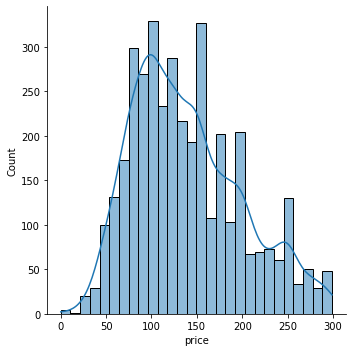

In [24]:
sns.displot(data=df_sample_vlowp, x='price', kind='hist',kde=True)


/home/pomilusky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


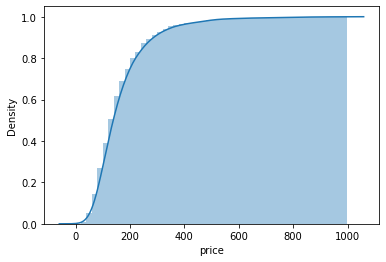

In [25]:
# Behaviour in the rank of thelow prices
sns.distplot(df_sample_lowp.price,
             hist_kws={'cumulative': True},
             kde_kws={'cumulative': True}); 

/home/pomilusky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


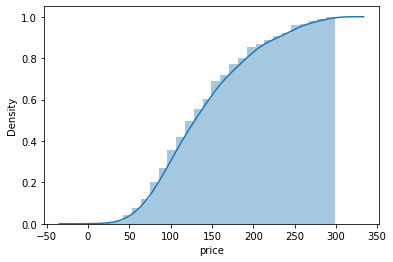

In [26]:
# Behaviour of higher prices,
sns.distplot(df_sample_vlowp.price,
            #bins = 5000,
            hist_kws={'cumulative': True},
            kde_kws={'cumulative': True}); 